# Import packages

In [62]:
#Test
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Set styles and sizes

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

# Import data sets

In [3]:
# Dataset URL on GitHub
url1 = 'https://raw.githubusercontent.com/ErikBusk/Happiness_v2/main/World-happiness-report-updated_2024.csv'
url2 = 'https://raw.githubusercontent.com/ErikBusk/Happiness_v2/main/World-happiness-report-2024.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(url1, encoding='latin-1')
df24 = pd.read_csv(url2, encoding='latin-1')

# Data cleaning

In [4]:
# Understand data set with all years

In [5]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [6]:
len(df)

2363

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [8]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [9]:
# The data set has several null values. These are replaced with the mean for each column
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [10]:
# Check there are no null values remaining
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [11]:
# Understand data set for 2024

In [12]:
df24.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [13]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [14]:
df24.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [15]:
# Null values are replaced with the mean for each column
numeric_cols = df24.select_dtypes(include=np.number).columns
df24[numeric_cols] = df24[numeric_cols].fillna(df24[numeric_cols].mean())

In [16]:
# Check there are no null values remaining
df24.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [17]:
# Only keep columns relevant for 2024 analysis

In [18]:
df24_columns = ['Country name' , 'Regional indicator' , 'Ladder score', 'Log GDP per capita' , 'Social support' , 'Healthy life expectancy' , 'Freedom to make life choices' , 'Generosity' , 'Perceptions of corruption']

In [19]:
df24 = df24[df24_columns].copy()

In [20]:
# Rename columns
df24 = df24.rename(columns={
    'Country name': 'country_name',
    'Regional indicator': 'regional_indicator',
    'Ladder score': 'happiness_score',
    'Log GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy': 'healthy_life_expectancy',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption'
})

In [21]:
# Check to see that only the relevant columns remain
df24.head()

,country_name,regional_indicator,happiness_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


# Exploratory data anlaysis

In [22]:
# Analysis of the data set from 2024

In [23]:
df24.describe()

,happiness_score,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121
std,1.170717,0.420584,0.329777,0.163171,0.160766,0.072661,0.124898
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.726000,1.079000,0.924500,0.400000,0.531000,0.092500,0.069000
50%,5.785000,1.403000,1.217000,0.549000,0.632000,0.138000,0.122000
75%,6.416000,1.733000,1.377000,0.644000,0.734000,0.191500,0.191000
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'Middle East and North Africa'),
  Text(2, 0, 'North America and ANZ'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Central and Eastern Europe'),
  Text(5, 0, 'Southeast Asia'),
  Text(6, 0, 'East Asia'),
  Text(7, 0, 'Commonwealth of Independent States'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'South Asia')])

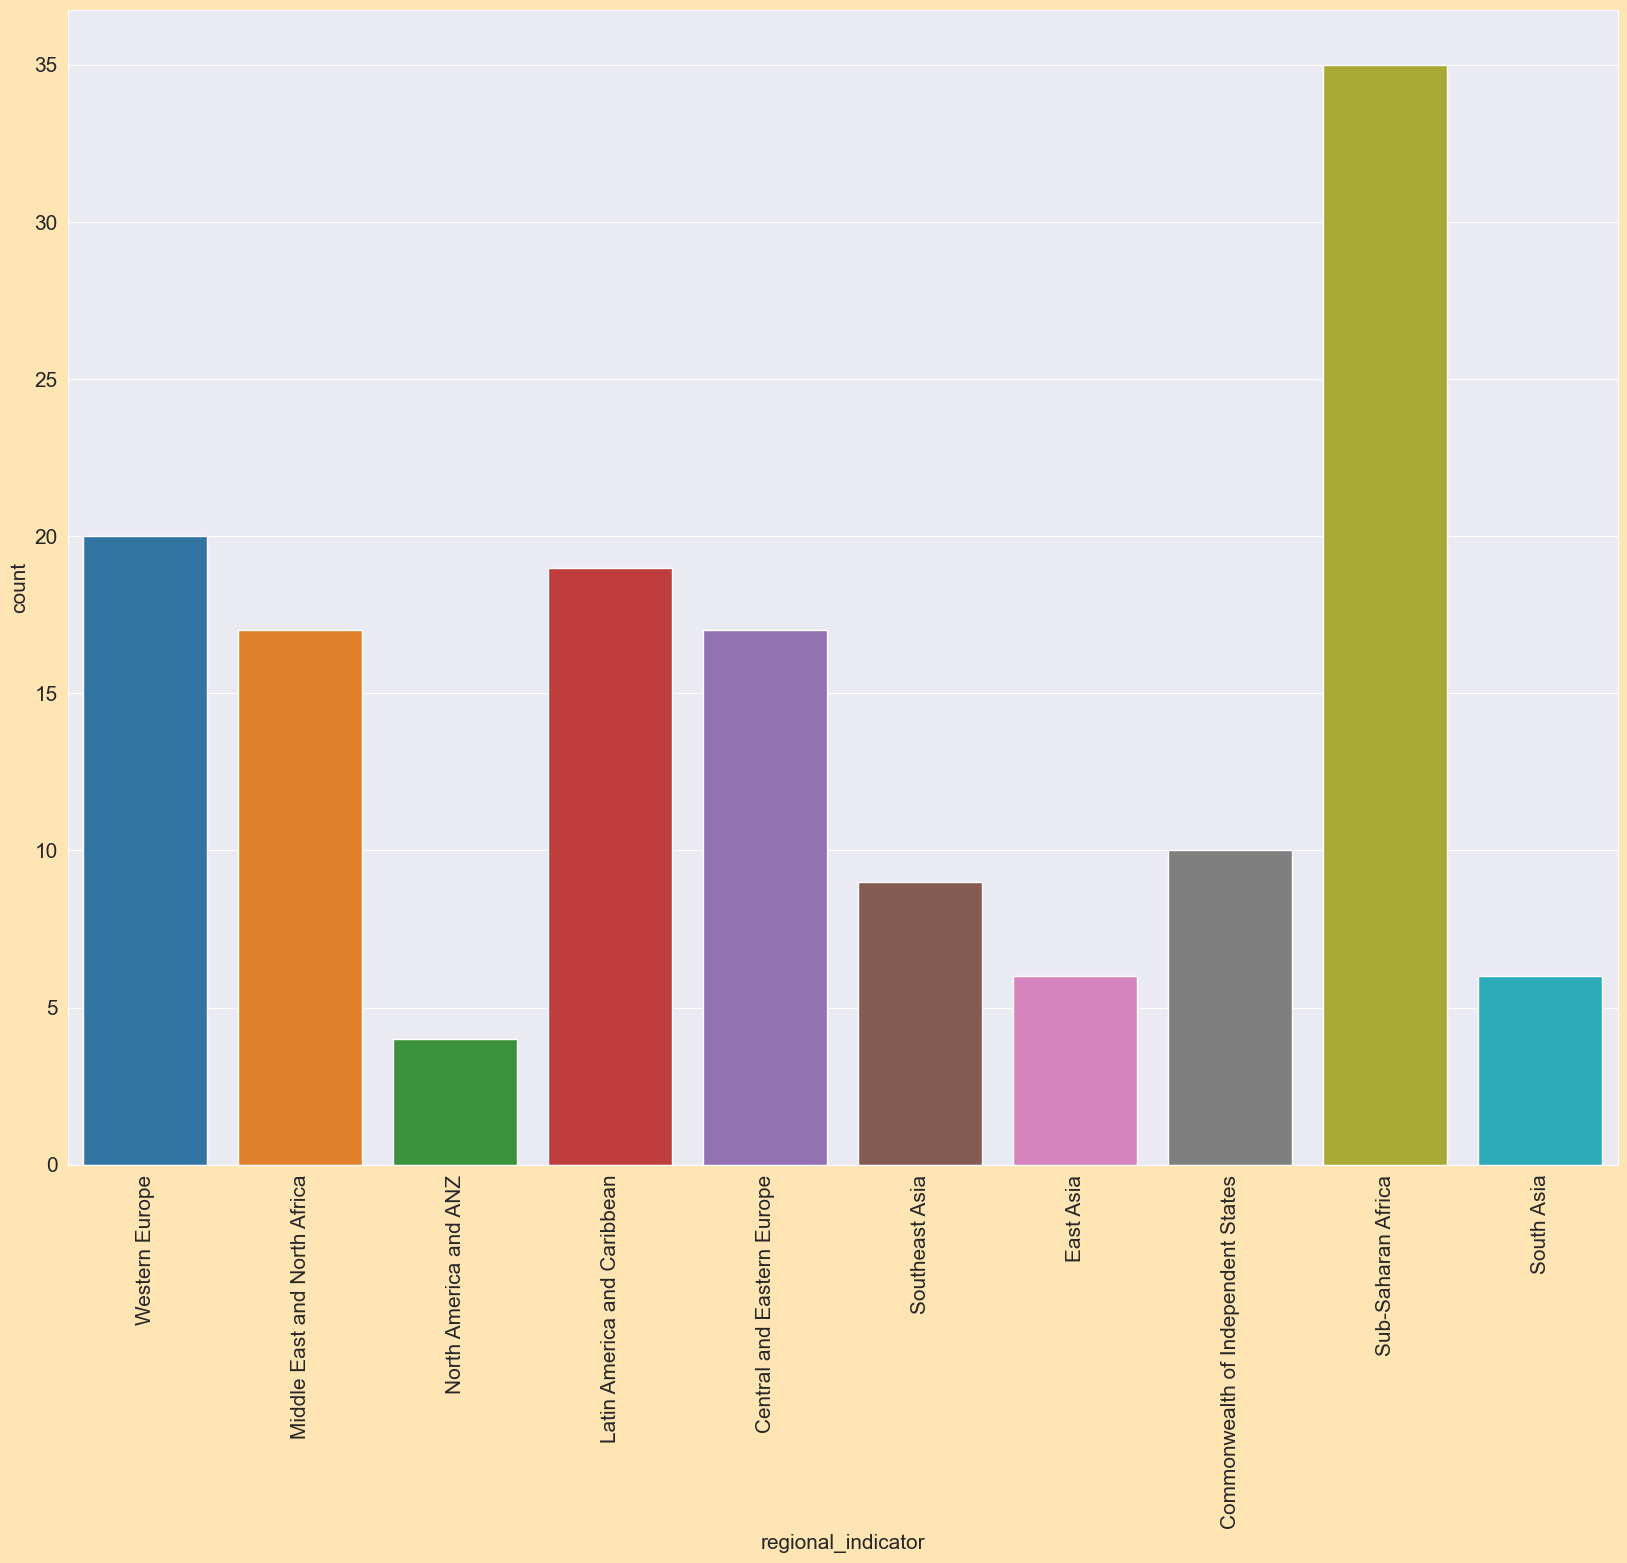

In [32]:
# Plot number of countires per region
sns.countplot(x ='regional_indicator', data = df24)
plt.xticks(rotation = 90)

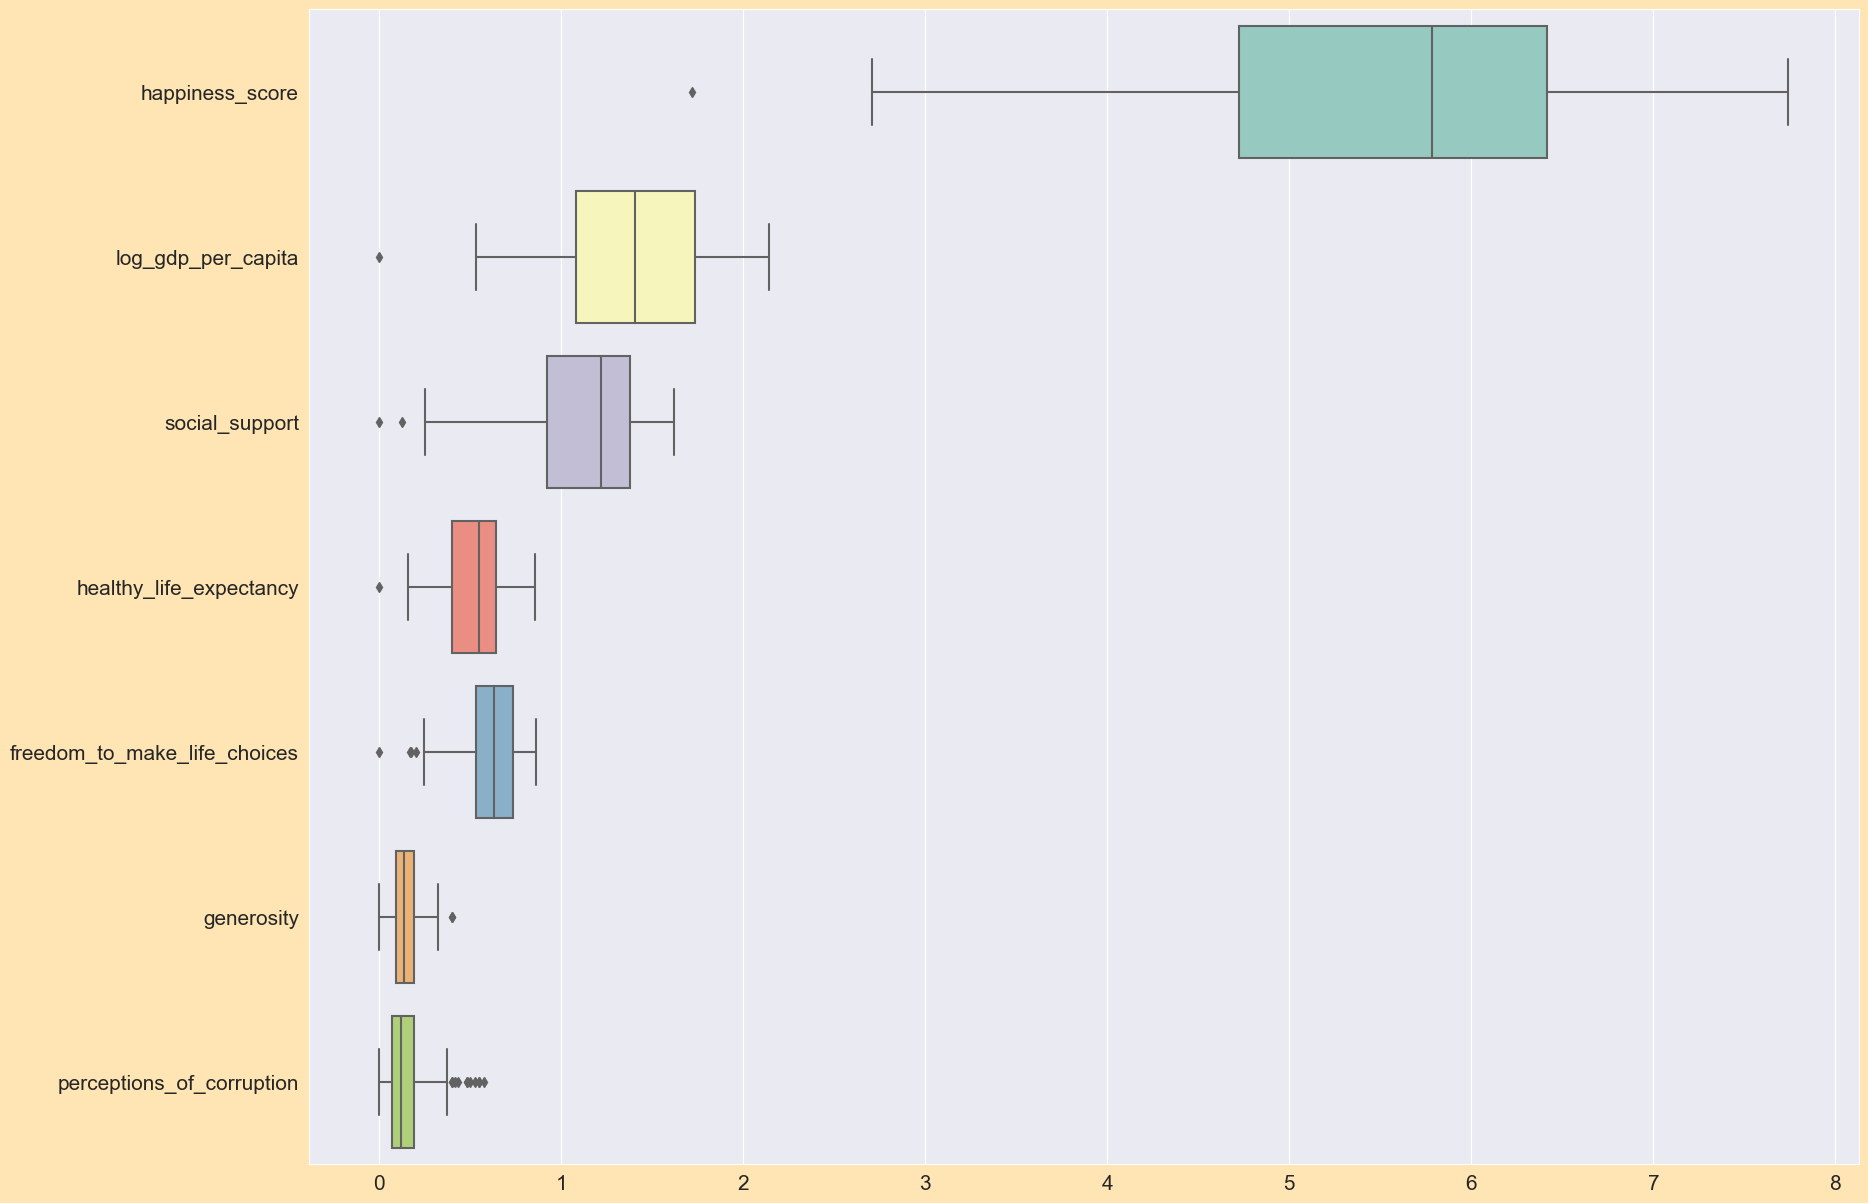

In [37]:
parameters = ['happiness_score', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption' ]
sns.boxplot(data=df24.loc[:, parameters], orient='h', palette='Set3')
plt.show()

In [ ]:
# There are most outliers in "perceptions of corruption"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Finland'),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Iceland'),
  Text(3, 0, 'Sweden'),
  Text(4, 0, 'Israel'),
  Text(5, 0, 'Congo (Kinshasa)'),
  Text(6, 0, 'Sierra Leone'),
  Text(7, 0, 'Lesotho'),
  Text(8, 0, 'Lebanon'),
  Text(9, 0, 'Afghanistan')])

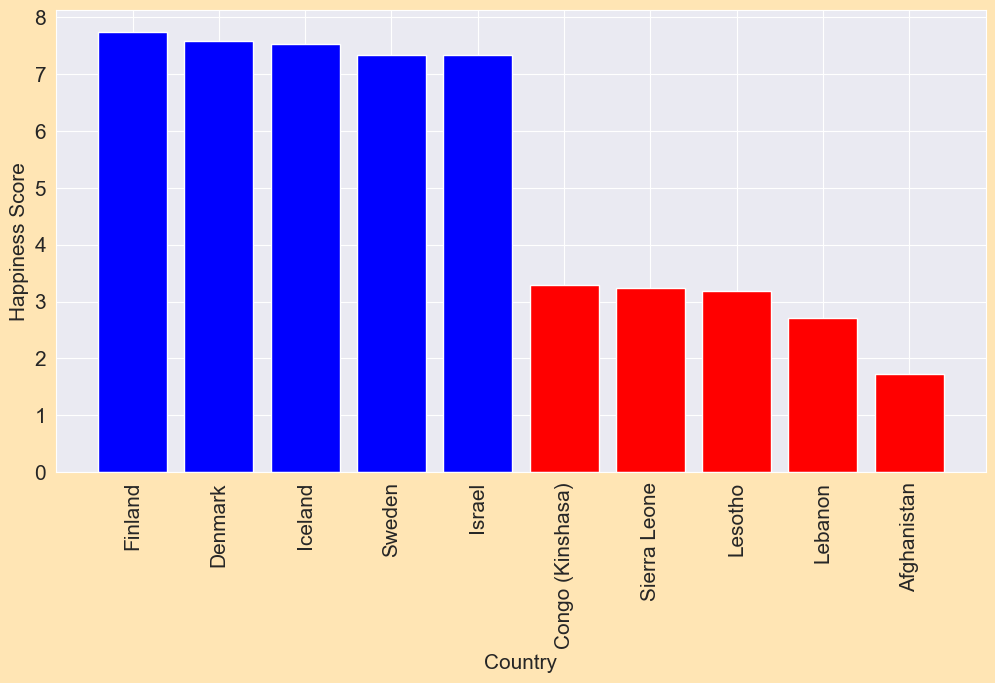

In [50]:
# Plot the happiest and least happy countries

sorted_df = df24.sort_values('happiness_score', ascending=False)
top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)
top_and_bottom_5 = pd.concat([top_5, bottom_5])

plt.figure(figsize=(12, 6))
plt.bar(top_and_bottom_5['country_name'], top_and_bottom_5['happiness_score'], color=['blue']*5 + ['red']*5)

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=90)


<Axes: xlabel='happiness_score', ylabel='Density'>

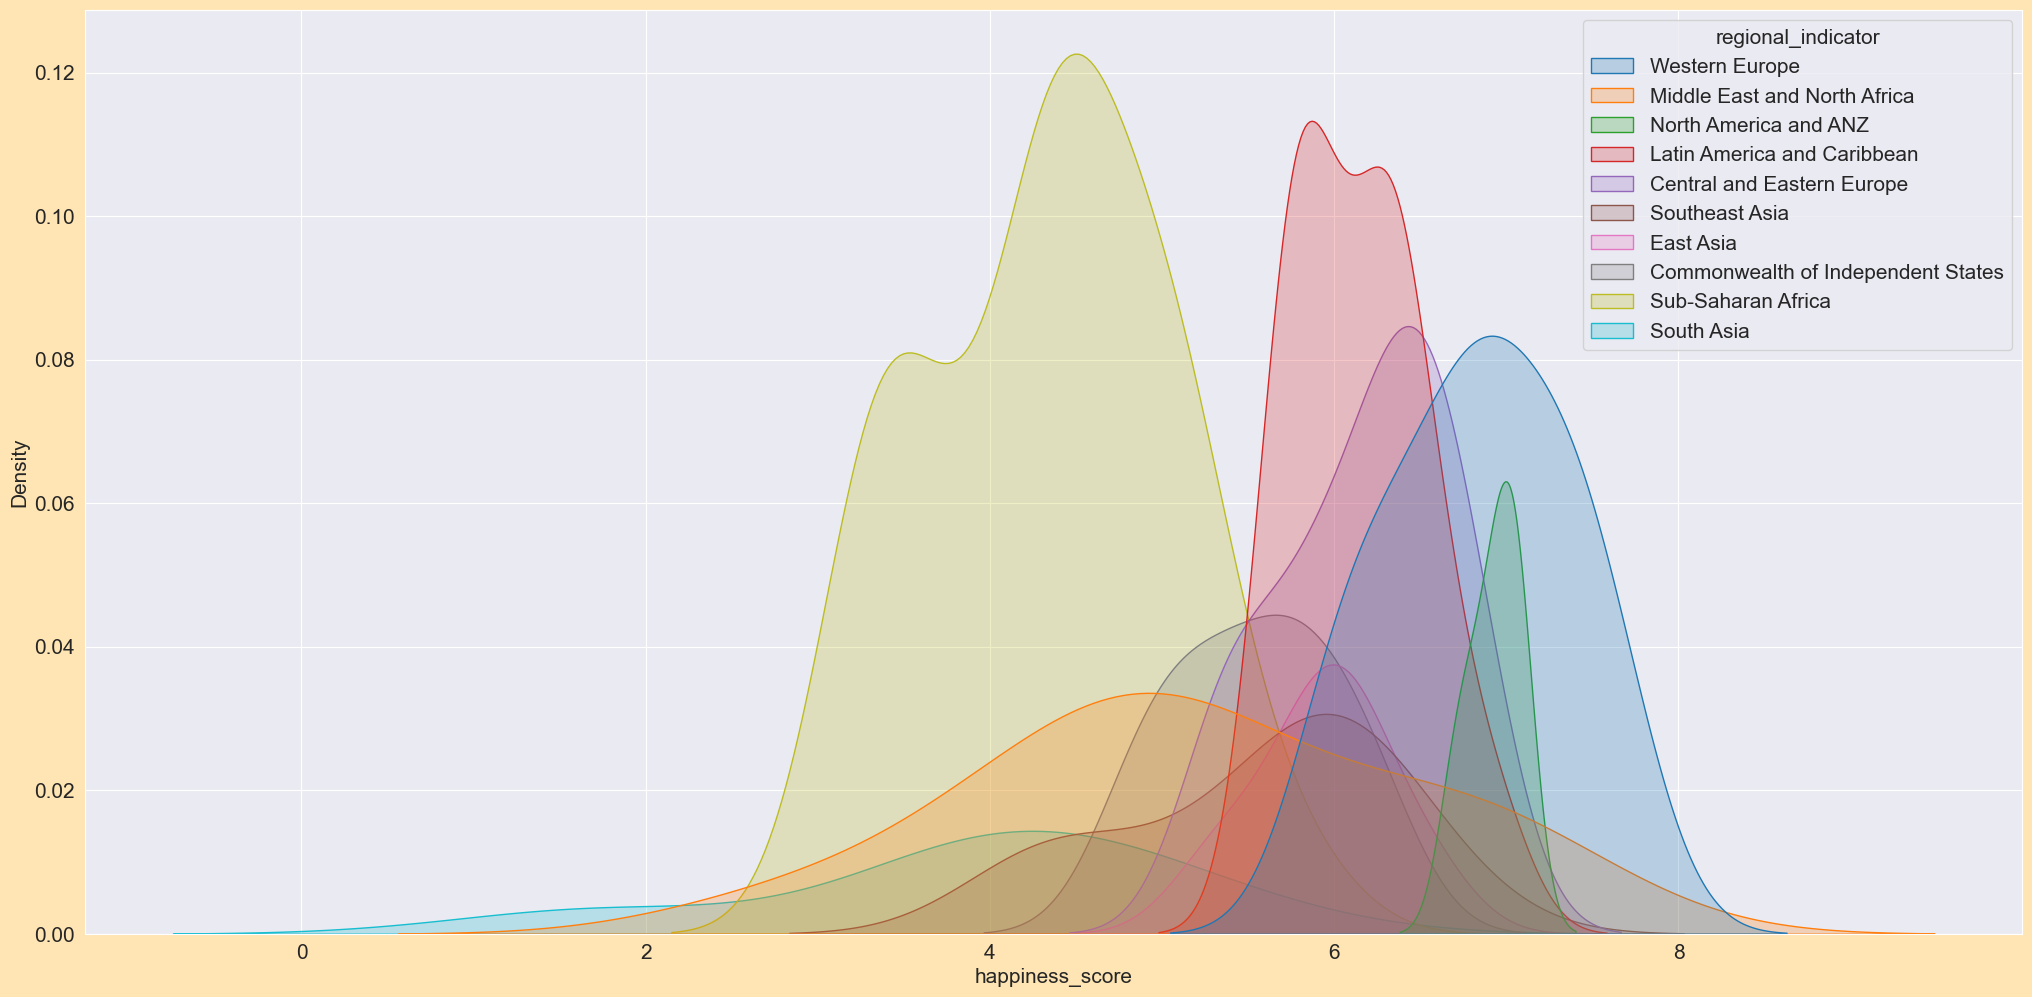

In [54]:
# Plot happiness distribution by region
plt.figure(figsize = (25,12))
sns.kdeplot(x=df24['happiness_score'], hue = df24['regional_indicator'], fill = True,)

In [55]:
# As can be seen in the graph happiness is generally highest in "Western Europe" and "North America and ANZ". The middle east and north africa have a wide flat curve indicating that there is a wide distribution of the hapiness score of the conutries in this region

<Axes: >

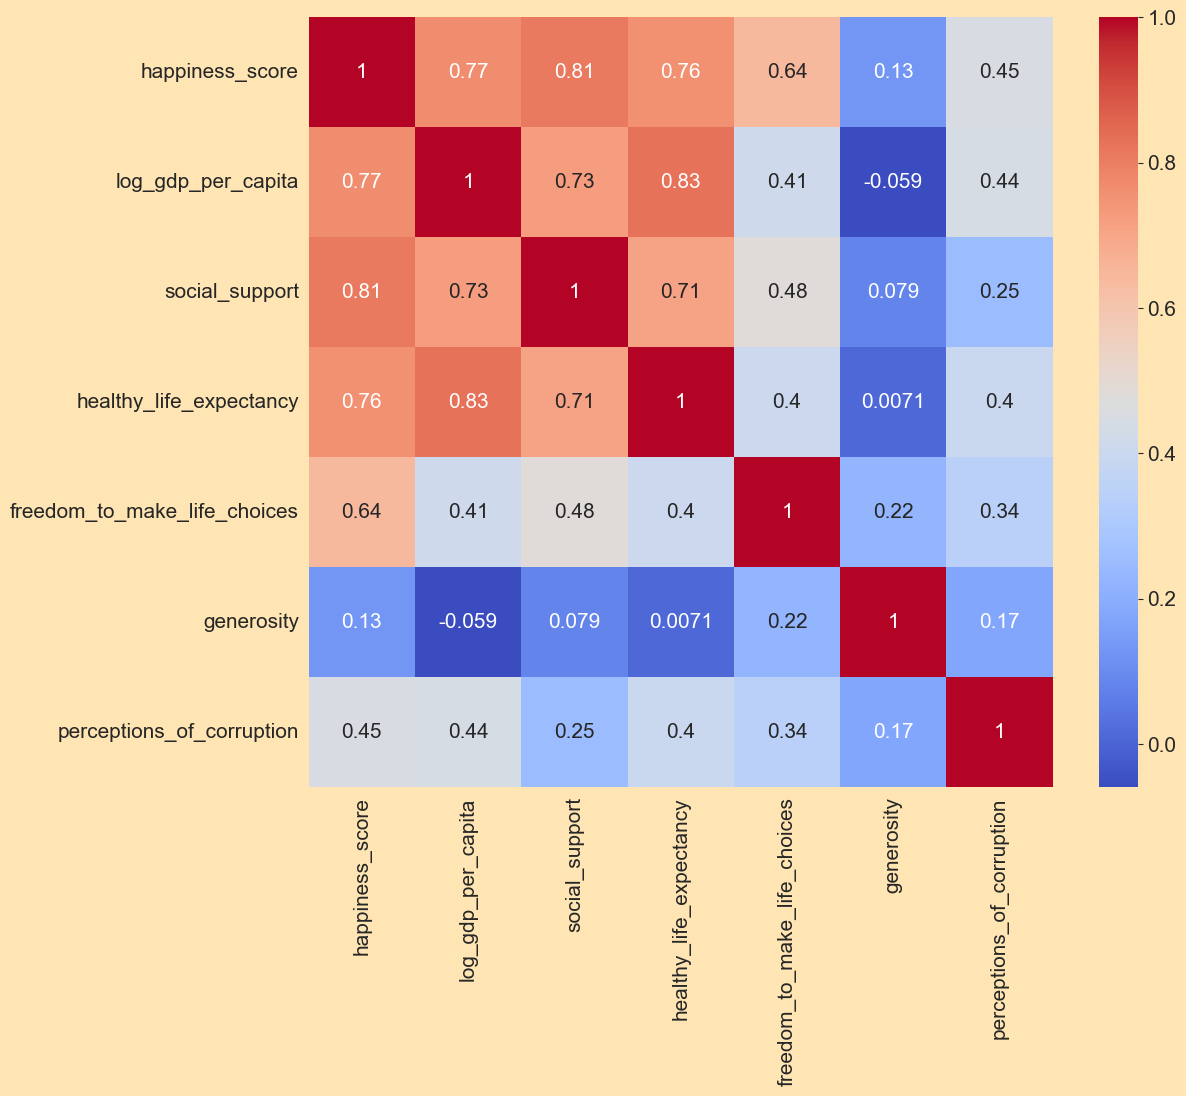

In [58]:
# Plot the correlation matrix for the 2024 data

numeric_cols = df24.select_dtypes(include=['number']).columns
correlation_matrix = df24[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


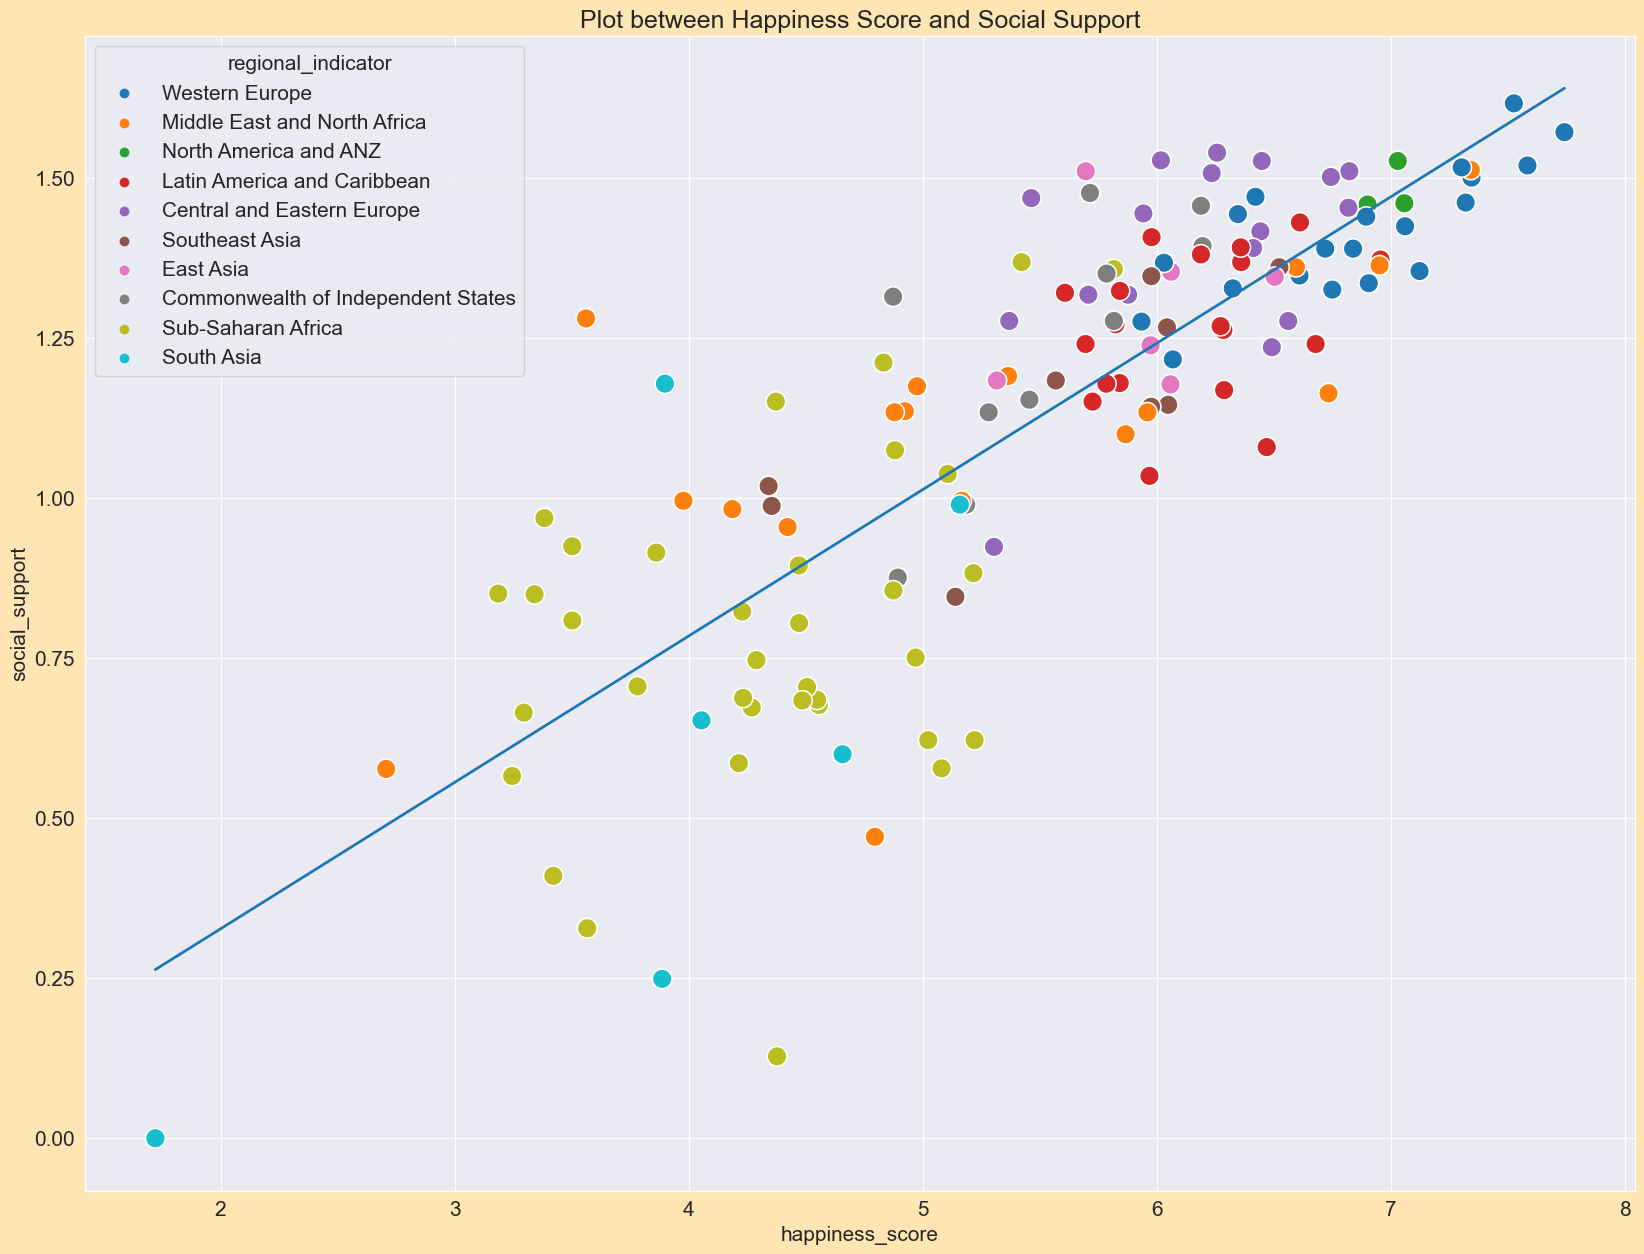

In [61]:
# As can be seen in the matrix the strongest correlation is between happiness score and social support. A scatterplot is therefore created based on these parameters.

plt.rcParams['figure.figsize'] = (20, 15)
plt.title('Plot between Happiness Score and Social Support')
sns.scatterplot(x=df24.happiness_score, 
                 y=df24.social_support, 
                 hue=df24.regional_indicator, 
                 s=200)

x = df24.happiness_score
y = df24.social_support
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), linewidth=2)

In [67]:
# Happiness comparison by country and over time

figure = px.choropleth(df.sort_values('year'), 
                    locations = 'Country name',
                    color ='Life Ladder',
                    locationmode = 'country names',
                    animation_frame = 'year')
figure.show()